In [32]:
# mlp for regression from here: https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/ 
from numpy import sqrt
from numpy import loadtxt
import numpy as np
from pandas import read_csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# load dataset from csv file
#df = read_csv("pv_large.csv", header=None)
#dataset = loadtxt('pv_large.csv', delimiter=',')
dataset = loadtxt('pv_large_4d_sample.csv', delimiter=',')
feature_names = ['d1', 'd2', 'd3', 'd4', 'eta']


#df.columns = feature_names
#print(df.head())

#df = df.rename(columns={'eta': 'efficiency'})
#print(df.describe())


#Split into features and target (Price)
#X = df.drop('efficiency', axis = 1)
#y = df['efficiency']
X = dataset[:,0:4]
y = dataset[:,4]


# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# determine the number of input features
n_features = X_train.shape[1]

# define model
#model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
#model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=4))
model.add(Dense(20, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

# compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

# fit model
history = model.fit(X_train, y_train, validation_split=0.2, epochs =120)




(3350, 4) (1650, 4) (3350,) (1650,)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 20)                100       
                                                                 
 dense_41 (Dense)            (None, 20)                420       
                                                                 
 dense_42 (Dense)            (None, 14)                294       
                                                                 
 dense_43 (Dense)            (None, 14)                210       
                                                                 
 dense_44 (Dense)            (None, 10)                150       
                                                                 
 dense_45 (Dense)            (None, 10)                110       
                                                                 
 dense_46 (Dense) 

Epoch 48/120
84/84 [==============================] - 0s 1ms/step - loss: 1.1415e-06 - mae: 8.0321e-04 - val_loss: 1.1517e-06 - val_mae: 7.4984e-04
Epoch 49/120
84/84 [==============================] - 0s 1ms/step - loss: 1.2761e-06 - mae: 8.5351e-04 - val_loss: 2.0942e-06 - val_mae: 0.0011
Epoch 50/120
84/84 [==============================] - 0s 1ms/step - loss: 1.3805e-06 - mae: 9.1522e-04 - val_loss: 1.2398e-06 - val_mae: 8.1781e-04
Epoch 51/120
84/84 [==============================] - 0s 1ms/step - loss: 1.2920e-06 - mae: 8.7460e-04 - val_loss: 1.8061e-06 - val_mae: 9.4555e-04
Epoch 52/120
84/84 [==============================] - 0s 1ms/step - loss: 1.1252e-06 - mae: 8.0449e-04 - val_loss: 1.3058e-06 - val_mae: 8.3132e-04
Epoch 53/120
84/84 [==============================] - 0s 1ms/step - loss: 1.1814e-06 - mae: 8.4099e-04 - val_loss: 1.2366e-06 - val_mae: 8.3980e-04
Epoch 54/120
84/84 [==============================] - 0s 1ms/step - loss: 1.1391e-06 - mae: 8.1895e-04 - val_loss: 1

84/84 [==============================] - 0s 1ms/step - loss: 8.3983e-07 - mae: 7.0810e-04 - val_loss: 5.9142e-07 - val_mae: 5.6884e-04
Epoch 104/120
84/84 [==============================] - 0s 1ms/step - loss: 7.7528e-07 - mae: 6.7509e-04 - val_loss: 6.2644e-07 - val_mae: 5.6176e-04
Epoch 105/120
84/84 [==============================] - 0s 1ms/step - loss: 7.2318e-07 - mae: 6.5458e-04 - val_loss: 7.5138e-07 - val_mae: 6.7362e-04
Epoch 106/120
84/84 [==============================] - 0s 1ms/step - loss: 8.2231e-07 - mae: 6.9000e-04 - val_loss: 9.8116e-07 - val_mae: 7.5626e-04
Epoch 107/120
84/84 [==============================] - 0s 1ms/step - loss: 6.5469e-07 - mae: 6.1878e-04 - val_loss: 1.0623e-06 - val_mae: 8.6478e-04
Epoch 108/120
84/84 [==============================] - 0s 1ms/step - loss: 5.9535e-07 - mae: 5.8815e-04 - val_loss: 6.0661e-07 - val_mae: 5.5872e-04
Epoch 109/120
84/84 [==============================] - 0s 1ms/step - loss: 6.2401e-07 - mae: 6.0065e-04 - val_loss: 5.87

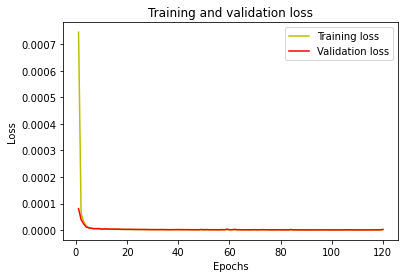

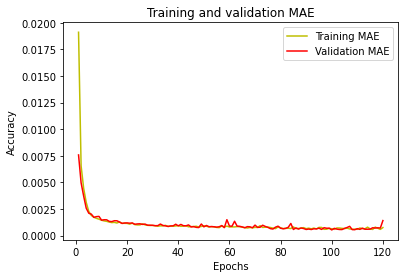

In [33]:

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
print(len(X_test))
import timeit




In [ ]:

############################################
#Predict on test data
predictions = model.predict(X_test)
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])
##############################################

#Comparison with other models..
#Neural network - from the current code
mse_neural, mae_neural = model.evaluate(X_test, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)



In [34]:
# load dataset from csv file
#df = read_csv("pv_4_layer.csv", header=None)
dataset2 = loadtxt('pv_4_layer.csv', delimiter=',')

X_test = dataset2[:,0:4]/200.
y_expected = dataset2[:,4]

print(len(y_expected))


40000


In [4]:
%timeit model.predict(X_test)

492 ms ± 3.52 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
print(493e-3/40000.)
print(3.35e-3/40000.)

In [37]:
predictions = model.predict(X_test)
error=0.
print(len(y_expected))
idx = 0
for i in range(1, 199):
    for j in range(1, 199):
        idx_i_f = (i+1)*200 + j
        idx_i_b = (i-1)*200 + j
        idx_j_f = i*200 + j + 1
        idx_j_b = i*200 + j - 1
        real_grad_j = (y_expected[idx_j_f] - y_expected[idx_j_b])/2e-9
        real_grad_i = (y_expected[idx_i_f] - y_expected[idx_i_b])/2e-9
        norm = np.sqrt(real_grad_j **2 + real_grad_i ** 2)
        nn_grad_j = (predictions[idx_j_f][0] - predictions[idx_j_b][0])/2e-9
        nn_grad_i = (predictions[idx_i_f][0] - predictions[idx_i_b][0])/2e-9
        # dot product
        error += (real_grad_j * nn_grad_j + real_grad_i * nn_grad_i) / norm ** 2
        #error +=  (np.abs(real_grad_j - nn_grad_j) + np.abs(real_grad_i - nn_grad_i))  / norm
        
#for i in range(0, len(y_expected)):
#    error += np.abs(predictions[i][0]-y_expected[i])
print(error/len(y_expected))

40000
0.9662749184135259


In [28]:
exact_max = [0, 0, 0,0,0]
rf_max = [0, 0, 0, 0, 0]
idx=0
for i in range(0, len(y_expected)):
    if y_expected[idx]>exact_max[4]:
        exact_max[:4] = X_test[idx]*200
        exact_max[4] = y_expected[idx]
    if predictions[idx]>rf_max[4]:
        rf_max[:4] = X_test[idx]*200
        rf_max[4] = predictions[idx]
    idx += 1


In [31]:
print(exact_max)
print(rf_max)

[4.0, 49.0, 25.0, 7.000000000000001, 0.08608508334103682]
[4.0, 49.0, 28.999999999999996, 1.0, array([0.08551949], dtype=float32)]


In [ ]:
a = 4.
b = 49.

print(np.isclose(a,b,atol=0.5))
#g = open("sampled_4_layer.dat")
for i in range(0, len(X_train[:,0])):
    d1 = X_train[i,0] * 200
    d2 = X_train[i,1] * 200
    d3 = X_train[i,2] * 200
    d4 = X_train[i,3] * 200
    if np.isclose(a,d1, atol=1) and np.isclose(b, d2, atol=1):
        print(X_train[i,0]*200, X_train[i,1]*200, X_train[i,2]*200, X_train[i,3]*200, y_train[i])
    
    